<a href="https://colab.research.google.com/github/velasale/AI534-Machine-Learning/blob/main/IA0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AI534 Warm up excercises 0

This is a warm-up assignment (individual) for you to get familiar with some basics:
1. Using google colab and python notebook to complete implememtation assignments
2. Basic packages and functions for working with data, performing simple analysis and plotting.
3. Walk you through some such basic steps for getting an intuitive understanding of what your data looks like, which is the first step to tackling any machine learning problem.

We will use a data set that contains historic data on houses sold between May 2014 to May 2015. Each house in the data set is described by a set of 20 descriptors of the house (referred to as features or attributes, denoted by **x** mathematically) and taged with the selling price of the house (referred to as the target variable or label, denoted as *y*).

Let's get started by importing the necessary packages.

In [1]:
!pip install nbconvert > /dev/null 2>&1
!pip install pdfkit > /dev/null 2>&1
!apt-get install -y wkhtmltopdf > /dev/null 2>&1
import os
import pdfkit
import contextlib
import sys
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Follow along step 1: accessing and loading the data

First, you need to download the file ia0_train.csv (provided on canvas) to your google drive. To allow the colab to access your google drive, you need to mount Google Drive from your notebook:



In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Set the path to the data file:

In [4]:
file_path='/content/gdrive/MyDrive/AI534/ia0_train.csv' #please use the same path to store your data file to avoid needing modification to run your code.

Now load the csv data into a DataFrame, and take a look to see what it looks like.

In [7]:
raw_data = pd.read_csv(file_path)
raw_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7972604355,5/21/2014,3,1.00,1020,7874,1.0,0,0,3,...,1020,0,1956,0,98106,47.5175,-122.346,1290,7320,2.1800
1,8731951130,6/9/2014,3,2.25,2210,8000,2.0,0,0,4,...,2210,0,1969,0,98023,47.3085,-122.381,1990,8000,2.5025
2,7885800740,2/18/2015,4,2.50,2350,5835,2.0,0,0,3,...,2350,0,2003,0,98042,47.3494,-122.153,3010,5772,2.7000
3,4232900940,5/22/2014,3,1.50,1660,4800,2.0,0,0,3,...,1660,0,1907,0,98119,47.6352,-122.358,1690,4000,9.2630
4,3275850190,9/5/2014,3,2.50,2410,9916,2.0,0,0,4,...,2410,0,1989,0,98052,47.6911,-122.103,2310,8212,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4222500410,2/26/2015,4,1.75,2000,7350,1.0,0,0,3,...,1100,900,1963,0,98003,47.3428,-122.303,1720,7350,2.6700
7996,1150700170,9/26/2014,4,2.25,1870,6693,2.0,0,0,3,...,1870,0,1996,0,98003,47.2774,-122.299,1650,6518,2.9900
7997,1959702045,11/19/2014,2,1.00,1240,5500,1.0,0,0,3,...,1240,0,1954,0,98102,47.6461,-122.317,2080,4400,9.0000
7998,7234601221,10/14/2014,3,1.50,1280,2114,1.5,0,0,3,...,1280,0,1904,0,98122,47.6174,-122.308,1540,1456,6.8750


In [8]:
#you can see the data type for each column
raw_data.dtypes

,0
id,int64
date,object
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


### Follow along step 2: Understanding and preprocessing the data

As you can see from the output of the previous cell, there are 10k examples, each with 21 columns in this csv file. The column 'price' stores the price of the house, which we hope our model can learn to predict. The other columns are considered the input features (or attributes). Before feeding this data to a machine learning algorithm to learn a model, it is always a good idea to examine the features, as **features are not always useful** and also they might be in a format that is not well suited for our learning algorithm to consume.
Here are two immediate issues in this regard:
1. The ID feature is a unique identifyer assigned to each example, hence it carries no useful information for generalization and should not be included as a feature for machine learning.  You should drop this column from the data before feeding to the learning algorithm.

2. The date feature is currently in the object format, which means it is string. Most of ML algorithms assume numerical inputs, hence we want to change it into a numerical feautre. Here please break the date string into three separate numerical values representing the Month, day and year of sale respectively.

In [9]:
#1. drop the ID column
data_without_id = raw_data.drop(columns=['id'])
data_without_id.dtypes

,0
date,object
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
grade,int64


In [10]:
#2. handle the date feature and convert it to datetime
data_without_id['date']=pd.to_datetime(data_without_id['date'], format='%m/%d/%Y')
#extract month, day, and year into separate columns
data_without_id['SaleMonth'] = data_without_id['date'].dt.month
data_without_id['SaleDay'] = data_without_id['date'].dt.day
data_without_id['SaleYear'] = data_without_id['date'].dt.year
#drop the original date column
data_without_id=data_without_id.drop(columns=['date'])
data_without_id.dtypes

,0
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
grade,int64
sqft_above,int64


### Follow along step 3: check out some specific features

The first thing coming to mind when buying a house is the number of rooms, bedrooms, bathrooms, these are going to be among the most important factors deciding the price of a house. So let's check these features out. Specifically, let's take a look at the statistics of these features.

In [11]:
# Group the data by the 'bedrooms' column and calculate statistics for 'price'
bedroom_stats = data_without_id.groupby('bedrooms')['price'].agg(['mean', 'median', 'min', 'max', 'count'])
bedroom_stats

,mean,median,min,max,count
bedrooms,,,,,
1,3.340914,3.146,0.89950,12.50,80
2,3.917504,3.700,0.82500,17.00,1035
3,4.667360,4.170,0.82000,38.00,3579
4,6.305826,5.500,1.39000,40.00,2600
5,7.582359,6.190,1.58550,53.50,591
6,8.652208,6.700,2.30000,68.90,95
7,9.530048,5.650,3.10000,24.50,12
8,6.915000,6.915,5.75000,8.08,2
9,7.446663,7.000,5.99999,9.34,3


In [12]:
# Group the data by the 'bathrooms' column and calculate statistics for 'price'
bathroom_stats = data_without_id.groupby('bathrooms')['price'].agg(['mean', 'median', 'min', 'max', 'count'])
bathroom_stats

,mean,median,min,max,count
bathrooms,,,,,
0.50,2.640000,2.64000,2.5500,2.730,2
0.75,3.218479,2.90000,1.0000,5.621,23
1.00,3.482674,3.24400,0.8200,13.000,1404
1.25,6.156500,3.21950,2.7500,12.500,3
1.50,4.136978,3.75000,1.3400,13.800,542
1.75,4.554531,4.30000,1.2075,15.000,1131
2.00,4.522037,4.10000,1.1500,17.000,723
2.25,5.301349,4.65000,1.6000,24.000,746
2.50,5.557118,5.00000,1.5800,29.000,2000


You can see there are a lot more unique values than one might expect (what is .75 bathroom? I wonder about that too). Now to verify our intuition that more bedroom and bath room leads to higher pricing, we can further visualize the price distribution for each bedroom and bathroom number. This can be achived by grouping price data by the different values of bedrooms, and bathrooms, then use box plots to visualize how prices are distributed, given specific values for the numbers of bedrooms / bathrooms:

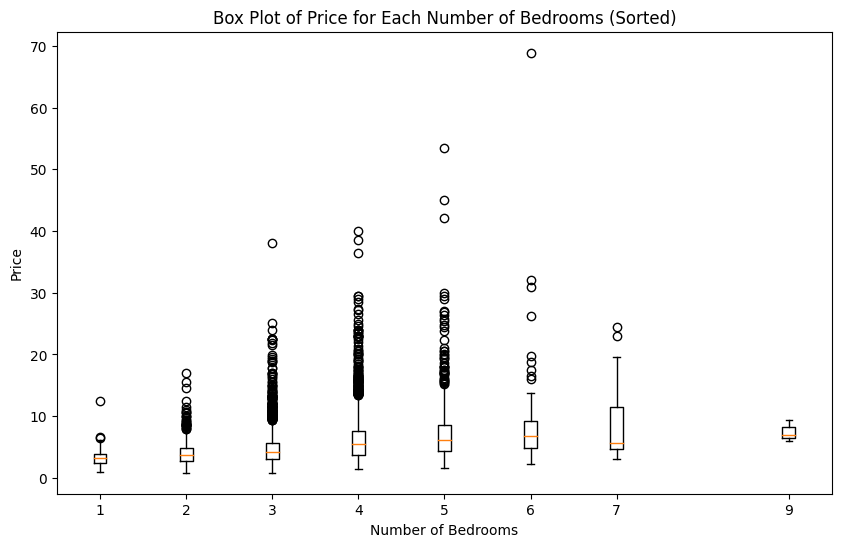

In [13]:
# find the unique number of bedrooms in the data
unique_bedrooms = sorted(data_without_id['bedrooms'].unique())

# Create a box plot of 'price' for each unique number of bedrooms with at least 3 examples
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for num in unique_bedrooms:
    bedroom_data = data_without_id[data_without_id['bedrooms'] == num]['price']

    # Skip plotting if there are less than 3 examples with this number of bedrooms. you can remove the skipping and see the effect.
    if len(bedroom_data) >= 3:
        plt.boxplot(bedroom_data, positions=[num], labels=[num], showfliers=True)

# Add labels and a title to the plot
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price for Each Number of Bedrooms (Sorted)')

# Show the plot
plt.show()

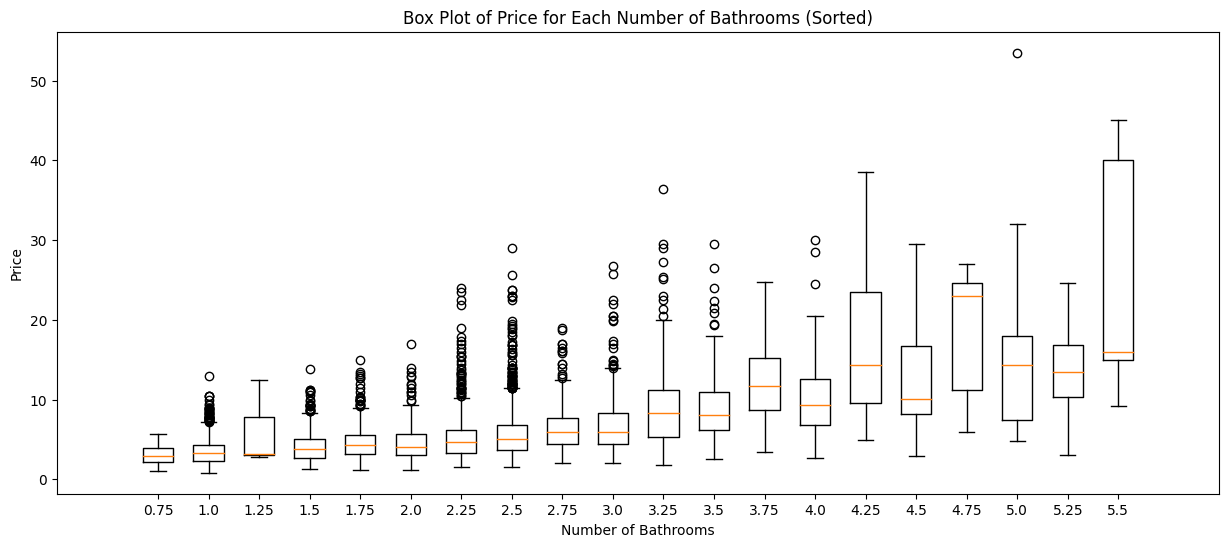

In [14]:
# find the unique number of bathrooms in the data
unique_bathrooms = sorted(data_without_id['bathrooms'].unique())

# Create a box plot of 'price' for each unique number of bedrooms with at least 3 examples
plt.figure(figsize=(15, 6))  # Adjust the figure size if needed

for num in unique_bathrooms:
    bathroom_data = data_without_id[data_without_id['bathrooms'] == num]['price']

    # Skip plotting if there are less than 3 examples with this number of bedrooms
    if len(bathroom_data) >= 3:
        plt.boxplot(bathroom_data, positions=[num], labels=[num])

# Add labels and a title to the plot
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price for Each Number of Bathrooms (Sorted)')

# Show the plot
plt.show()

As can be seen from the results above, the price does appear to adhere to the "more rooms -> more expensive" trend. We can also create a heatmap to show the price of the house as a function of the # of bathroom and # of bedrooms using the seaborn package.

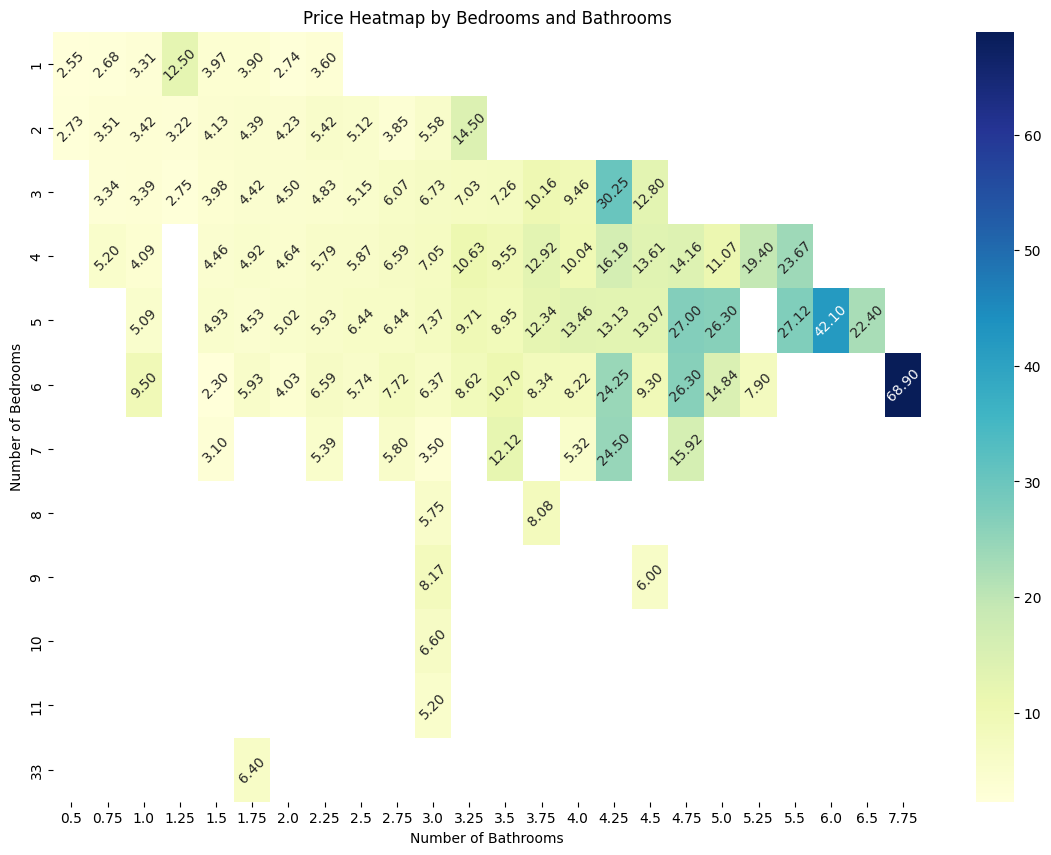

In [15]:
import seaborn as sns

# Create a pivot table to prepare data for the heatmap
pivot_table = data_without_id.pivot_table(index='bedrooms', columns='bathrooms', values='price', aggfunc='mean')

# Create a heatmap using seaborn
plt.figure(figsize=(14, 10))  # Adjust the figure size if needed
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)

for text in heatmap.texts:
    text.set(rotation=45)

# Add labels and a title to the plot
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.title('Price Heatmap by Bedrooms and Bathrooms')

# Show the plot
plt.show()

Does the trend follow your expection? Any outliers?

**add you answers here**


Another intuitively important feature for a house is the square footage of the house. We can plot the price of the house agaist the square footage of the house and see if there is a clear trend as expected.

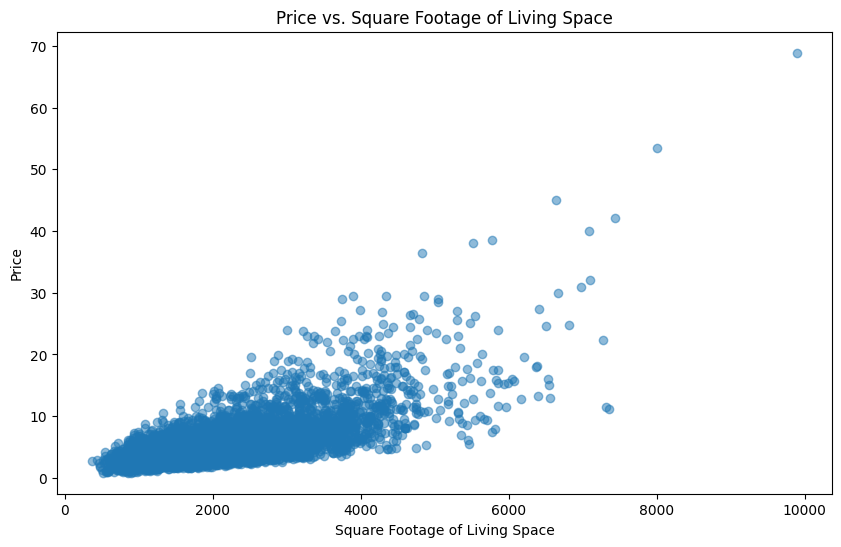

In [16]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(data_without_id['sqft_living'], data_without_id['price'], alpha=0.5)

# Add labels and a title to the plot
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Living Space')

# Show the plot
plt.show()

Closer inspection reveals that there are several features associated with square footage. Let's see how strongly correlated they are with one another.

In [17]:
data_without_id[["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"]].corr()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,sqft_basement
sqft_living,1.000000,0.164651,0.762189,0.178888,0.878699,0.416699
sqft_lot,0.164651,1.000000,0.139211,0.774133,0.176956,0.007146
sqft_living15,0.762189,0.139211,1.000000,0.171446,0.737738,0.188109
sqft_lot15,0.178888,0.774133,0.171446,1.000000,0.190612,0.010897
sqft_above,0.878699,0.176956,0.737738,0.190612,1.000000,-0.067804
sqft_basement,0.416699,0.007146,0.188109,0.010897,-0.067804,1.000000


Sqft_living and sqft_above are the two most correlated feautres. We can visualize their relationship by using a scatter plot:

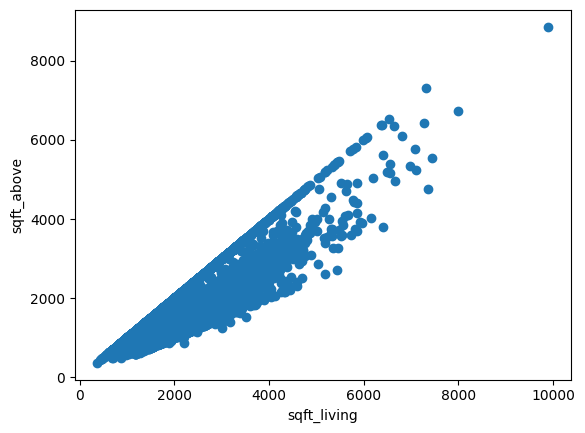

In [18]:
plt.scatter(data_without_id['sqft_living'].values, data_without_id['sqft_above'].values)
plt.xlabel("sqft_living")
plt.ylabel("sqft_above")
plt.show()

When we have features that are highly redundant, it is important to understand the impact of such redundant features to the learning algorithm. We will explore more on this in later assignments.

### TO DO 1: do a bit exploration of other features on our own (5 pts)


TO DO: perform similar analysis to at least two other features of your choice. Use a text box to report your observations and understanding of these features.

In [ ]:
# put your code here for exploring other feautres. Feel free to use more blocks of text and code

## TO DO 2: handling categorical features (5 pts)
Many of the features appear to be numeric but in reality are of discrete nature --- in other words, they are more appropriately viewed as categorical variables. For example:

In [ ]:
unique_zips = sorted(data_without_id['zipcode'].unique())
print(unique_zips)

Read the following article https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f
to understand the difference between different types of categorical features and approaches to handle categorical features when the learning algorithm requires umerical inputs.

Based on the reading above, what features in this data can be considered as "nominal" and "ordinal" features respectively?

Nominal:   **Put your answers here**

Ordinal: **put your answers here**

Based on the reading, please suggest a couple of strategies that would be appropriate to handle the zipcode feature.

**Put your answers here**

In [ ]:
#running this code block will convert this notebook and its outputs into a pdf report.
!jupyter nbconvert --to html /content/gdrive/MyDrive/Colab\ Notebooks/IA0.ipynb  # you might need to change this path to appropriate value to location your copy of the IA0 notebook

input_html = '/content/gdrive/MyDrive/Colab Notebooks/IA0.html' #you might need to change this path accordingly
output_pdf = '/content/gdrive/MyDrive/Colab Notebooks/IA0output.pdf' #you might need to change this path or name accordingly

# Convert HTML to PDF
pdfkit.from_file(input_html, output_pdf)

# Download the generated PDF
files.download(output_pdf)